In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Exploratory data analysis

First, we will read in the training dataset and get some basic descriptions on the the columns and the state of missing data. This will help us determine how to approach filling in missing data, how the data are distributed, and what features we can engineer to provide seperability between those that survived and did not. We will be able to apply some titanic domain knowledge to develop some general spatial structure (what part of the ship the passenger was assigned to), and collaps some extranious information down into more usable forms. 

In [2]:
# Read in traning and test data and get an idea of the
#     structure of the combined and seperate data

titanic_train = pd.read_csv("./data/train.csv")
titanic_test = pd.read_csv("./data/test.csv")
titanic = pd.concat([titanic_train, titanic_test], sort=True).reset_index(drop=True) # we reset to resolve this error: ValueError: cannot reindex on an axis with duplicate labels

In [3]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [6]:
print("Train\n",titanic_train.isnull().sum())
print("\n\nTest\n",titanic_test.isnull().sum())

Train
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Test
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


O'all we have 891 observations in the training data and 418 in the test data.

The columns with missing values in the training data are Age, Cabin, and Embarked. We can make some educated guesses for some of theses but we do not want to throw away data if we can help it unless there is nothing telling within these data. 

The variable we are trying to ultimatally predict:
* Survived - a binary value with 0 as false and 1 as true, only present in the training data

The types of indicator data we are dealing with are: 
* Categorical (nominal data) -> Embarked
* Binary (nominal data) -> Sex
* Ordinal -> Pclass
* Continious (ratio data) -> Age, Fare
* Complex (multiple types of data) -> Cabin (infers deck, location on deck, proximity to favorable evacuation routes etc.) 
* Limited usefulness -> Name (there could be stuff to infer from this field; mr., mrs. ms., etc), Passenger ID (technically ordnial but this is just an index that as far as I can tell just follows alphebetical)


We will need to fill in the gaps for some of the null values using some domain knowledge and dead reckoning. To do that we need to explore these data. we will use graphical tools to handle the majority of this work.

#### Strength of correlations between variables

#### Survivorship by sex, class, and age - A preliminary analysis of Training data

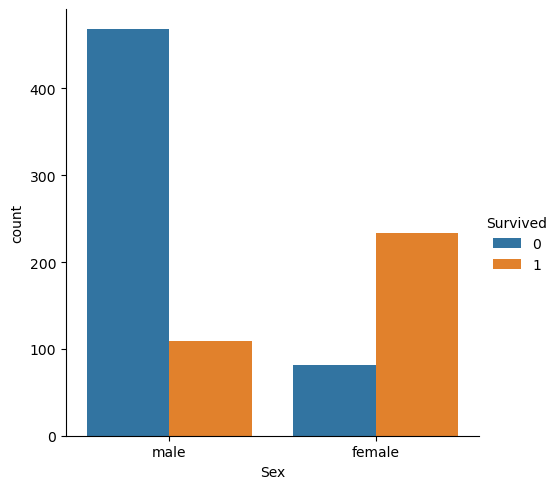

In [7]:
sns.catplot(x='Sex', hue='Survived', data=titanic_train, kind='count')

Visually wa can assume about 1 in 6 males survived and 5 of 7 females survived. We will break down by age and sex later. 

Text(0.5, 1.0, 'Survival vs Class Crosstab (Percentage of Class)')

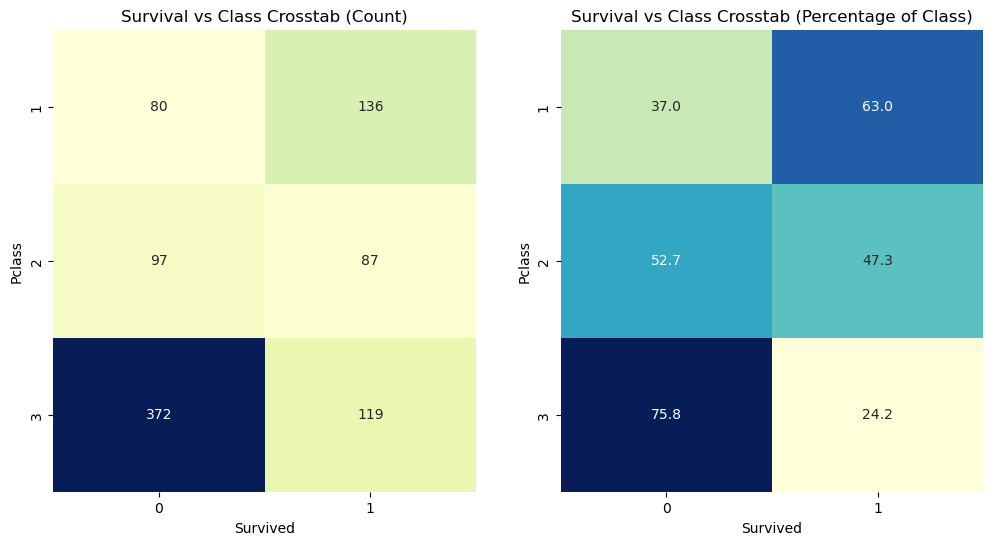

In [8]:
# Sort by passanger class and survival with a cross tabulation
pclass_survived = pd.crosstab(titanic_train['Pclass'], titanic_train['Survived'])
pclass_survived_percent = pclass_survived.div(pclass_survived.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1,2, figsize = (12,6))

sns.heatmap(pclass_survived, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0], cbar=False)
sns.heatmap(pclass_survived_percent, annot=True, fmt=".3", cmap="YlGnBu", ax=axes[1], cbar=False)

axes[0].set_title("Survival vs Class Crosstab (Count)")
axes[1].set_title("Survival vs Class Crosstab (Percentage of Class)")

Here we see that in absolute terms the most deaths were in third class, wehereas the best survivroship was in first class. 

In percentage terms third class had a mere ~24% survival rate, 2nd class had a ~47% survival rate and 1st class had a and far higher 63% survival rate. 

/tmp/ipykernel_1556174/3999783004.py:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.violinplot(y='Age', x='Sex', hue='Survived', data=titanic_train, split=True, palette=palette, ax=axes[1])
/tmp/ipykernel_1556174/3999783004.py:17: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.violinplot(y='Age', x='Pclass', hue='Survived', data=titanic_train, split=True, palette=palette, ax=axes[3])


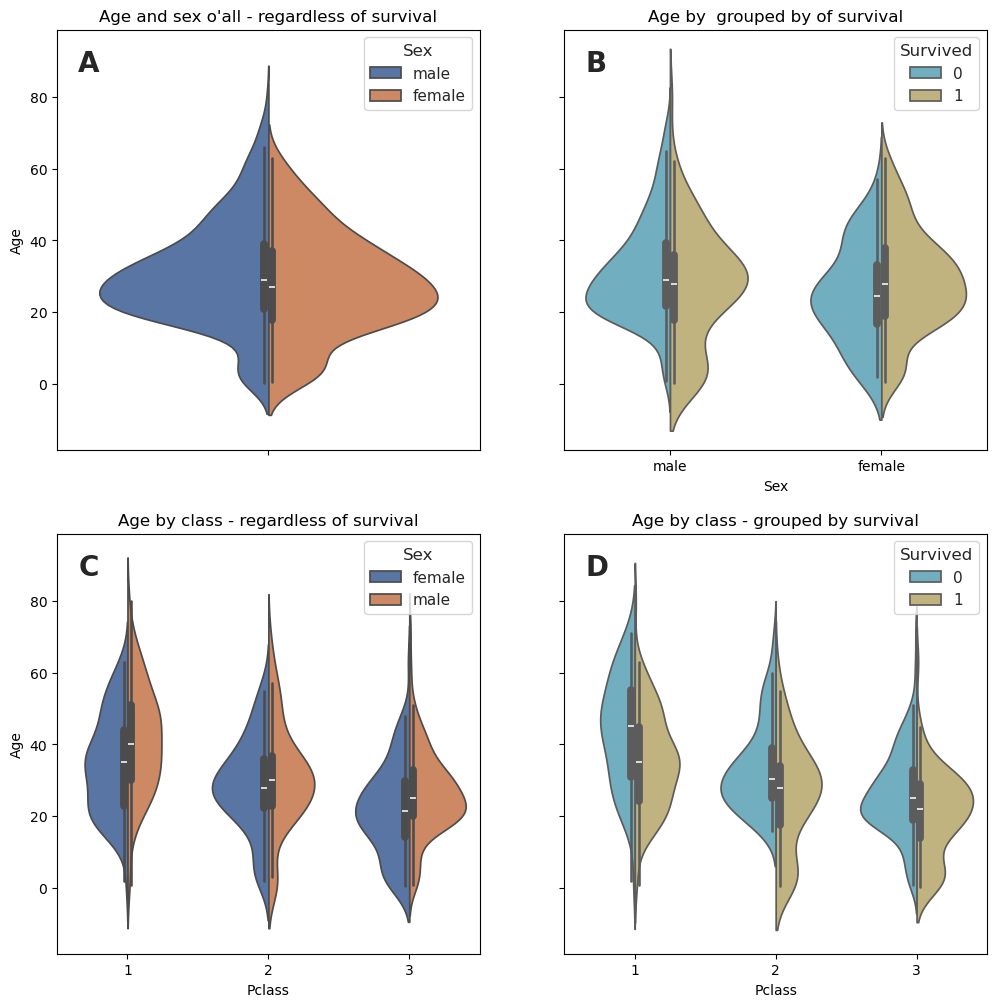

In [9]:
import string    #used to add subplot letters

# Age, class, and survivorship
fig, axes = plt.subplots(2,2,figsize=(12,12), sharey=True)
axes=axes.flatten()   #single index indexing

#seaborn style and color palette stuff
sns.set(style='whitegrid')
palette = sns.color_palette()#'Blues_d',n_colors=15) # no arguments returns the default
palette.reverse()

# Plot w/ violin plots to look at distributions
sns.violinplot(y='Age', hue='Sex', data=titanic_train, split=True, ax=axes[0])
sns.violinplot(y='Age', x='Sex', hue='Survived', data=titanic_train, split=True, palette=palette, ax=axes[1])
sns.violinplot(y='Age', x='Pclass', hue='Sex', data=titanic_train, split=True, ax=axes[2])

sns.violinplot(y='Age', x='Pclass', hue='Survived', data=titanic_train, split=True, palette=palette, ax=axes[3])

# Annotations titles and the like
axes[0].set_title("Age and sex o'all - regardless of survival")
axes[1].set_title("Age by  grouped by of survival")
axes[2].set_title("Age by class - regardless of survival")
axes[3].set_title("Age by class - grouped by survival")

#add subplot letters

for n, ax in enumerate(axes):   
    ax.text(0.05, .9, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')

There is a lot going on here, initial investigation in the training set of age, sex, passanger class, and survival:
<ol style="list-style-type: upper-alpha">
<li>Looking at the o'all demographics of all passngers regardless of survival: majority of passangers within the age range of 20-40 without a substantial deviation from a 50/50 gender split in that range. Children seem to have a bias towards more females, whereas the 60+ range has more males</li>
<li>When the overall age dmographics are broken down by class , we see a substanially more platykurtic distribution for first class, with females skewed younger than males. We also see this skew for third class - more younger females  </li>
<li>Looking at o'all survivorship by age and sex we can identify female surivorship os concentrated in the 20-40 year old range, beyond what the demographics in [A] may suggest. Male survivroship exhibits a bimodal distribution that is not nearly as pronounced in the overall demographiscs in [A] - male children and male adults (20-40) fair better than male teens.</li>
<li>Finally we break surviorship down by class. We see that in first class - our group which is the oldest overall - survivors tend to be a younger subset - so in the case of first class age seems to be a major factor. Second and third class - far more likely to be traveling with children sees the bimodal distrobution with children and  childrin</li>
</ol>

**Hypothesis from observations:** 
the bimodal distribuation of male survirorship needs to be invesagated further. The initial hypothisis is children survived regardless of sex by essence of bing children (duh). A higher ratio of male surviroship may be present for those men traveling with families or spouses. We will have to look at survivorship ratios over age for single men, men traveling with children (as in their own or as siblings).

#### Survivorship by Traveling Companions

As we noted above, we need to investigate (male) surviorship over age categories by: 
1) If they were traveling alone or with others - further broken down by class
2) If they were traveling with a a spouse - further boken down by class
3) If they were traveling with siblings - further broken down by class

This means we will use the Age category to make a classification of each passenger, whereafter we plot traces/box plots for each classification and each class.

We may further investigate by number of traveling companions

In [10]:
# Determine if the passenger was alone or not (not traveling with family)
titanic_train['alone'] = titanic_train[['SibSp','Parch']].eq(0).any(axis=1)
# Same but for all data when we get around to using it later
titanic['alone'] = titanic[['SibSp','Parch']].eq(0).any(axis=1)

Let's also condiser family size, as there is more information that may be useful than just travleing alone ore not in a binary sense. 

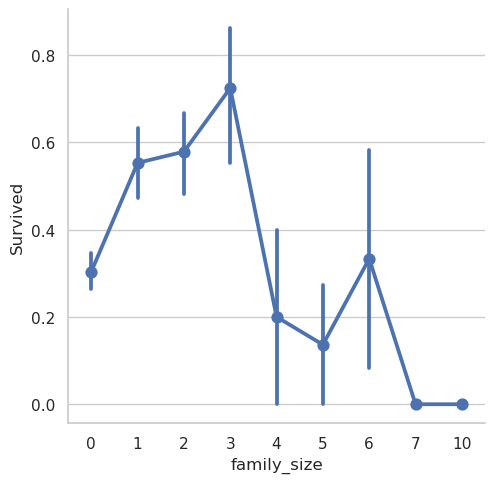

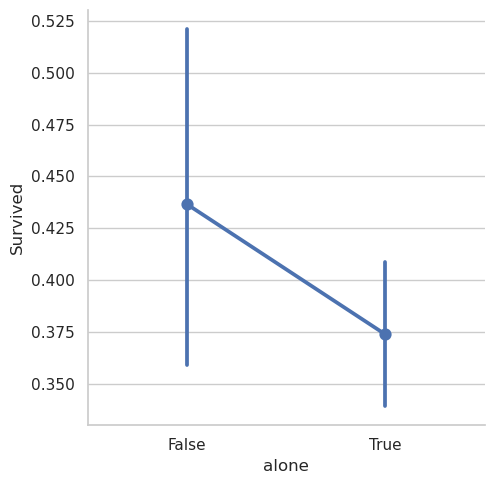

In [11]:
titanic_train['family_size'] = titanic_train['Parch'] + titanic_train['SibSp']
# Same but for all data when we get around to using it later
titanic['family_size'] = titanic['Parch'] + titanic['SibSp']

sns.catplot(x='family_size', y='Survived', data=titanic_train, kind='point')

sns.catplot(x='alone', y='Survived', data=titanic_train, kind='point')

Observations: 
* The survival rate of passengers traveling alone is less than those traveling with familiy.
* Family size of >5 has reduced survival rate, however there is no reason to believe that the distributions of family size are consistant across classes based on these data alone.

Let's quickly break down by class, where the first class - or more specifically decks closer to the boat deck, where first class was better situated - had different circumstances 

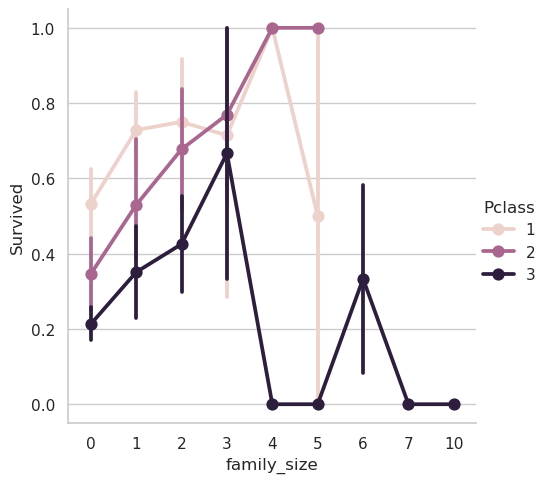

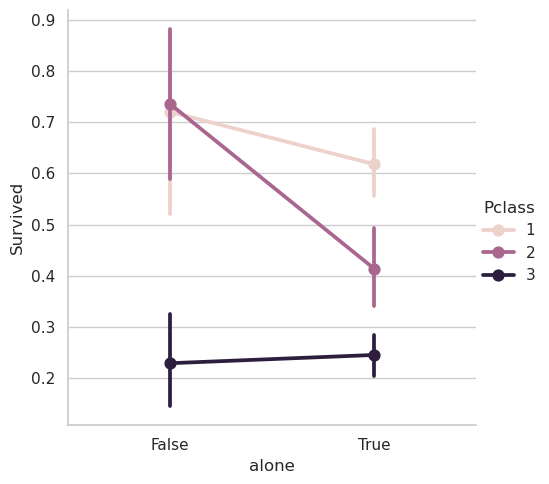

In [12]:
sns.catplot(x='family_size', y='Survived', hue='Pclass', data=titanic_train, kind='point')

sns.catplot(x='alone', y='Survived', hue='Pclass', data=titanic_train, kind='point')

Here we see a different story:
* Family size is larger for 3rd class - we would expect this based on outside knowledge of demographics and based on the data for the age distributions. The small number of observations for family sizes in first and second class results in substantial variance. 
* O'all survival rate by first and second class passengers decreased based on if they were traveling alone, third class did not see an o'all difference



In [13]:
#3-way cross tabulation to get surviorship by alone and class
pclass_alone_survived = pd.crosstab([titanic_train['Survived'], titanic_train['alone']], titanic_train['Pclass'])
pclass_alone_survived_percent = pd.crosstab([titanic['Survived'], titanic['alone']], titanic['Pclass'], normalize='columns')

# We need to check that our normalize was applied on the correct dim,
#    we want 100% accounted for across all 4 options for each class
pclass_alone_survived_percent.sum(axis=0)

Pclass
1    1.0
2    1.0
3    1.0
dtype: float64

In [14]:
#3-way cross tabulation to get surviorship by alone and class
pclass_alone_survived = pd.crosstab([titanic_train['Survived'], titanic_train['alone']], titanic_train['Pclass'])
pclass_alone_survived_percent = pd.crosstab([titanic_train['Survived'], titanic_train['alone']], titanic_train['Pclass'], normalize='columns')

# We need to check that our normalize was applied on the correct dim,
#    we want 100% accounted for across all 4 options for each class
pclass_alone_survived_percent.sum(axis=0)

Pclass
1    1.0
2    1.0
3    1.0
dtype: float64

<Axes: xlabel='Pclass', ylabel='Survived_Alone'>

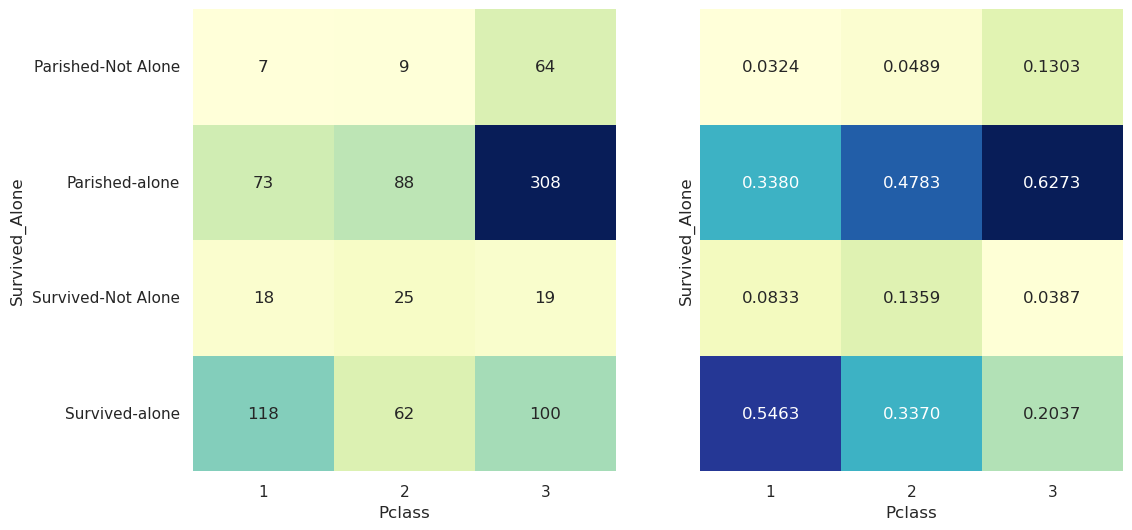

In [15]:
# Make a heatmap of survivorship percentage of the above
# Set up figure
fig, axes = plt.subplots(1,2,figsize=(12,6), sharey=True)

# Make a dict so we can map col names later
idx_key = {'True':'alone', 'False':'Not Alone', '0':'Parished', '1':'Survived'}

#seset indicies so they become columns we can manipulate
pclass_alone_survived_reset = pclass_alone_survived.reset_index()
pclass_alone_survived_percent_reset = pclass_alone_survived_percent.reset_index()

# Combine the multi-index levels into a single level and make readable
pclass_alone_survived_reset['Survived_Alone'] = pclass_alone_survived_reset['Survived'].astype(str).map(idx_key) + '-' + pclass_alone_survived_reset['alone'].astype(str).map(idx_key)
pclass_alone_survived_percent_reset['Survived_Alone'] = pclass_alone_survived_percent_reset['Survived'].astype(str).map(idx_key) + '-' + pclass_alone_survived_percent_reset['alone'].astype(str).map(idx_key)

# Drop the original multi-index columns
df_plot = pclass_alone_survived_reset.drop(columns=['Survived', 'alone'])
df_plot_pct = pclass_alone_survived_percent_reset.drop(columns=['Survived', 'alone'])

# Set the new single index
df_plot = df_plot.set_index('Survived_Alone')
df_plot_pct = df_plot_pct.set_index('Survived_Alone')

# Create the heatmap
sns.heatmap(df_plot, annot=True, fmt=".0f", cmap="YlGnBu", cbar=False, ax=axes[0])
sns.heatmap(df_plot_pct, annot=True, fmt=".4f", cmap="YlGnBu", cbar=False, ax=axes[1])

# Display the plot


From this alone we can see that traveling alone survival was poor for third class in particular (308 deaths or 63%) and not great for second class either (88 deaths or ~48%). Survival for those traveling alone was better for first class (118 survivals for a rate of ~55%). 

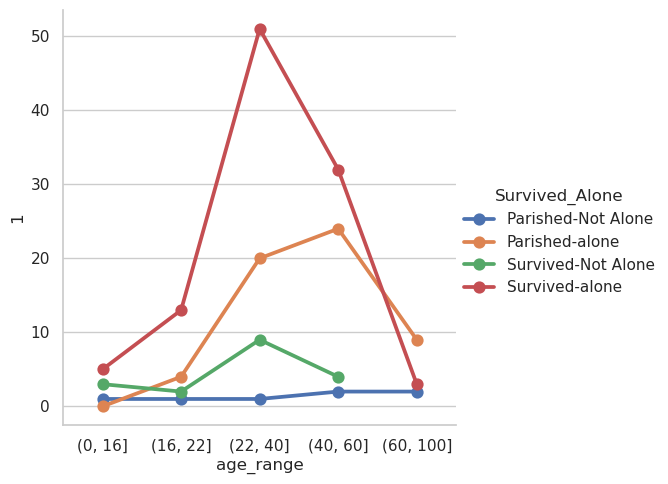

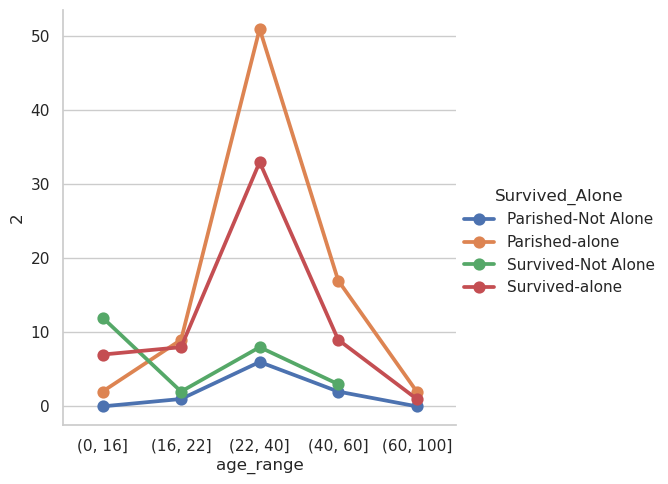

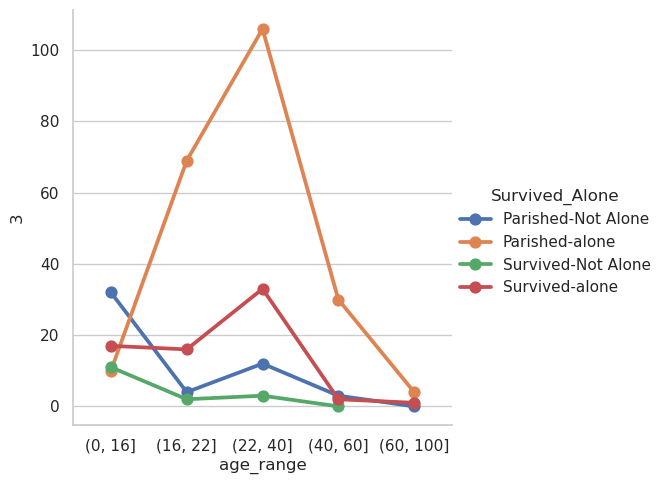

In [16]:
# Same cross tabulation as above, but we further break down by age category
#    The following are hand drawn deliniations to capture the bimodal distirbution we see,
#        we could use natural breaks or something if we wanted, quantiles, or fixed interval
#   [0-15, 16-22, 23-40, 41-60, 61-100]
age_range_bounds = [0,16,22,40,60,100]

titanic_train['age_range']=pd.cut(titanic_train['Age'], age_range_bounds, right=True) #right closes our interval on that number
# Same but for all data when we get around to using it later
titanic['age_range']=pd.cut(titanic['Age'], age_range_bounds, right=True) #right closes our interval on that number


age_alone_pclass_survived = pd.crosstab([titanic_train['Survived'],
                                         titanic_train['alone'],
                                         titanic_train['age_range']],
                                        titanic_train['Pclass'].astype(str))

age_alone_pclass_survived.reset_index(inplace=True)

age_alone_pclass_survived['Survived_Alone'] =\
            (age_alone_pclass_survived['Survived'].astype(str).map(idx_key) + '-' +
             age_alone_pclass_survived['alone'].astype(str).map(idx_key)).astype('category')


sns.catplot(x='age_range',
            y='1',    # 1 = first class, 2=second, 3=third
            hue='Survived_Alone',
            data=age_alone_pclass_survived,
            kind='point',
           )
sns.catplot(x='age_range',
            y='2',    # 1 = first class, 2=second, 3=third
            hue='Survived_Alone',
            data=age_alone_pclass_survived,
            kind='point',
           )
sns.catplot(x='age_range',
            y='3',    # 1 = first class, 2=second, 3=third
            hue='Survived_Alone',
            data=age_alone_pclass_survived,
            kind='point',
           )


Some observations on the test data:
* Surviving Alone in first class was very possible, although chances greatly deminished as a male with increasing age. This may come down to sex, which we could investigate for a better understanding. 

We could interrogate thes data further, but at this point the strength of the age-class-alone relationship with survival is apperent. 


#### Where Passengers Boarded
Let's now dive into a few clean-up items for missing data befor diving into infering some of the spatial complexity - especially for those on the lower decks. 


<Axes: xlabel='Embarked', ylabel='Age'>

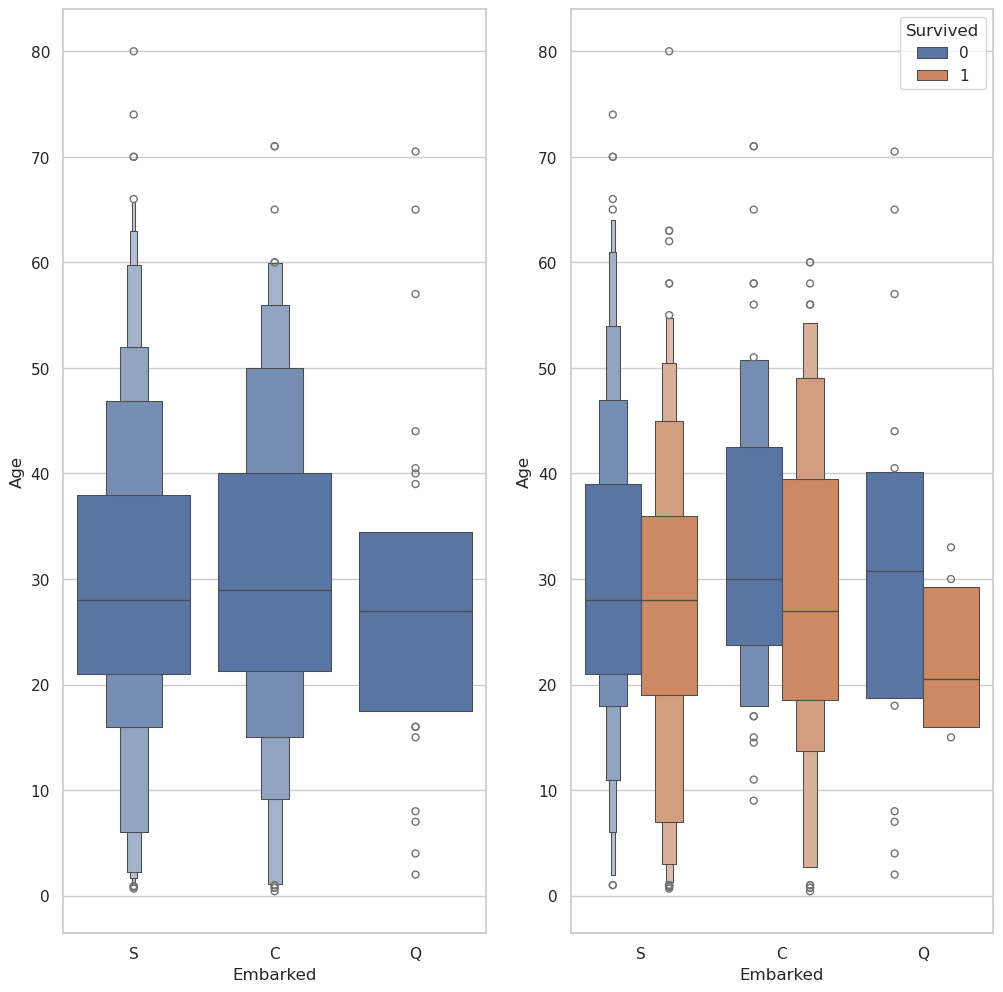

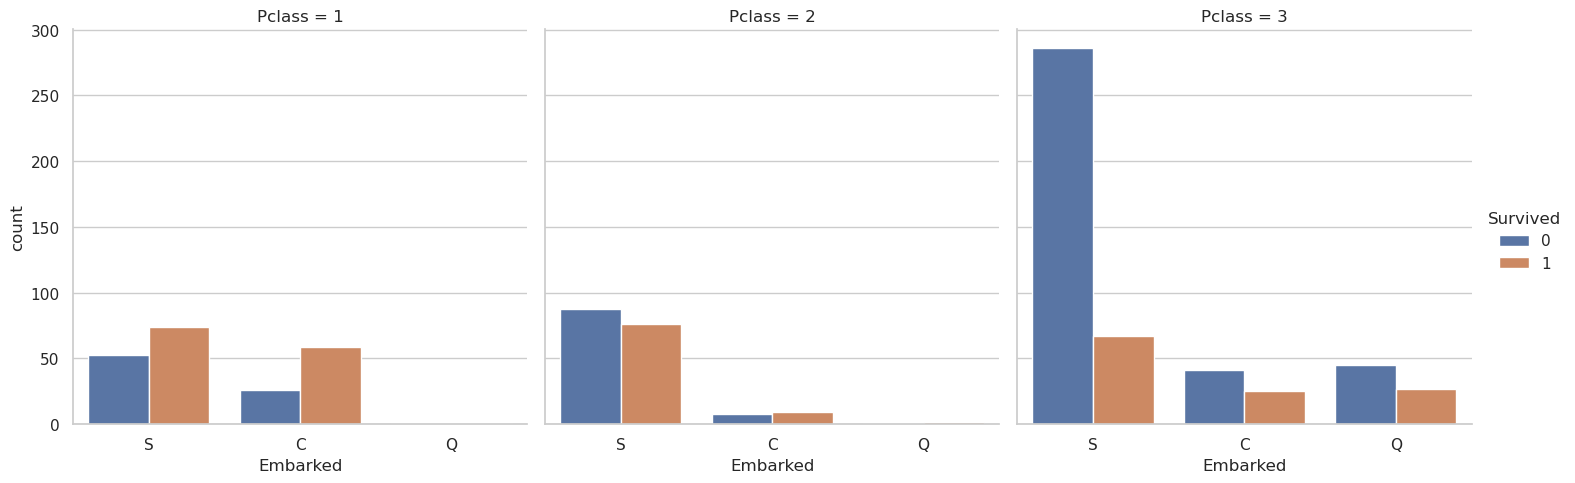

In [17]:
# Plot some age demographics vs where boarding occured as well as the
#    frequencies seen at each boarding loacation

fig, axes = plt.subplots(1,2, figsize=(12,12))
axes=axes.flatten()

sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = titanic_train) 

sns.boxenplot(x ='Embarked', y='Age', data = titanic_train, ax=axes[0])
sns.boxenplot(x ='Embarked', y='Age', hue ='Survived', data=titanic_train, ax=axes[1]) 

For third class we can safely fill missing Embarked values with "Q"

In [18]:
# Fill missing Embarked values
titanic_train["Embarked"] = titanic_train["Embarked"].fillna("Q")
# Same but for all data when we get around to using it later
titanic["Embarked"] = titanic["Embarked"].fillna("Q")

#### Determining Age for passengers with missing data

Identifying the Age field for passengers is a different kettle of fish, the domographics are differnt between classes, and filling with the median from each class doesn't necessarily make sense either (although is better than a flat value for all passengers).

First let's figure out how many values we are trying to find by class (fro combined test and train data)

In [19]:
print(titanic[(titanic['Age'].isna()) & (titanic['Pclass'] == 1)].shape[0])
print(titanic[(titanic['Age'].isna()) & (titanic['Pclass'] == 2)].shape[0])
print(titanic[(titanic['Age'].isna()) & (titanic['Pclass'] == 3)].shape[0])

39
16
208


We will use the nearest neighbor passenger's age (based on Pclass, and Sex) to fill nans in age. It is very possible to extend this to include things like marital status as well, although we will work on that feature later. 

In [20]:
from sklearn.impute import KNNImputer

# use all avalible data, not just train
df = titanic.copy(deep=True)   # temp dataframe to keep code clean (default is deep)

# Select the relevant features for the nearest neighbor
features = ['Pclass', 'Sex', 'Age']

# Convert 'Sex' column to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Create a copy of the dataframe with only the relevant features
df_features = df[features].copy()    # again, deep copy to ensure things are sepeated

# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply the KNN Imputer only to only the passengers missing 'Age' values
imputed_ages = knn_imputer.fit_transform(df_features)

# Create a mask to identify which values were originally NaN - so we don't overwrite good data
missing_ages_mask = df_features['Age'].isna()
#missing_ages_mask_train = df_features['Age'][:len(titanic_train)].isna()
#print(len(missing_ages_mask_train))

# Replace only the missing 'Age' values in the original titanic dataframe
# titanic_train.loc[missing_ages_mask_train, 'Age'] =\
#         imputed_ages[:len(missing_ages_mask_train),2][:len(missing_ages_mask_train)]
titanic.loc[missing_ages_mask, 'Age'] = imputed_ages[missing_ages_mask,2]
# --- #

# re-run our age ranges from before so we have the age ranges for those w/ missing ages
# titanic_train['age_range'] = pd.cut(titanic_train['Age'], age_range_bounds, right=True)
titanic['age_range'] = pd.cut(titanic['Age'], age_range_bounds, right=True) #right closes our interval on that number
titanic_train = titanic.iloc[:len(titanic_train.index)]    #Not the best way to do this, but data in are guarenteed to be sorted based on previous cells

#### Resolving location on the ship (Deck, part of ship, etc.)

The cabin feature offeres the deck to which the passenger was berthed in, although it is a little more complex than simply pulling a value. A large portion of the Cabin feature is missing, however the cabin feature shouldn't be ignored as some cabins may have higher survival rates. There are two main components to this:
* The deck letter (given by the first letter of the cabin number), A is closest to the boat deck, B is next and so-on. 
* The side of the ship (port/starboard) that the cabin was located on (given by the odd (starboard) or even (port) remaining portion of the cabin number). The stairways are mostly centeralized throughout the ship however an advantage to one side or another may present itself for a variety of latent passenger variables.

Decks were by-and-large seperated by passenger class, however there was some substantial sharing of decks by classes once you reach deck "D" and "E" where there are first, second, and third class (state)rooms all combined. We are able to extract a bit more information spatially (in a categorical sense) as these rooms are in seperate sections, not intermingles, (i.e., first class towards the front of the ship on deck "E" whereas third class is at the stern). We may be able to ascertain something about the ship and survival based on the clustering of (state)rooms the deck, and to a lesser degree, perhaps the side of the ship. 

In [21]:
# Create the Deck column from the cabin entries, striping the first letter. "M" will stand for "Missing"

titanic_train['deck'] = titanic_train['Cabin'].apply(lambda x: "M" if pd.isnull(x) else x[0])
titanic['deck'] = titanic['Cabin'].apply(lambda x: "M" if pd.isnull(x) else x[0])

# function to get to count by pclass and deck 
def prepare_deck_data(df):
    deck_data = pd.crosstab(df['deck'], df['Pclass']).stack().reset_index(name='Count')
    return deck_data

deck_data_train = prepare_deck_data(titanic_train)
deck_data = prepare_deck_data(titanic)

/tmp/ipykernel_1556174/2919416878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train['deck'] = titanic_train['Cabin'].apply(lambda x: "M" if pd.isnull(x) else x[0])


In [22]:
# Creating a dictionary covering passenger class count over eachc deck
def create_deck_counts(deck_data):
    decks = deck_data['deck'].unique()
    pclasses = [1, 2, 3]
    deck_counts = {deck: {pclass: 0 for pclass in pclasses} for deck in decks}

    for _, row in deck_data.iterrows():
        deck_counts[row['deck']][row['Pclass']] = row['Count']
        
    return deck_counts

deck_counts_train = create_deck_counts(deck_data_train)
deck_counts = create_deck_counts(deck_data)
deck_counts

{'A': {1: 22, 2: 0, 3: 0},
 'B': {1: 65, 2: 0, 3: 0},
 'C': {1: 94, 2: 0, 3: 0},
 'D': {1: 40, 2: 6, 3: 0},
 'E': {1: 34, 2: 4, 3: 3},
 'F': {1: 0, 2: 13, 3: 8},
 'G': {1: 0, 2: 0, 3: 5},
 'M': {1: 67, 2: 254, 3: 693},
 'T': {1: 1, 2: 0, 3: 0}}

In [23]:
# Same as above, but as percentages
def calculate_percentages(deck_counts):
    deck_percentages = {}
    for deck, counts in deck_counts.items():
        total = sum(counts.values())
        deck_percentages[deck] = [(count / total) * 100 if total > 0 else 0 for count in counts.values()]
    return deck_percentages

deck_percentages_train = calculate_percentages(deck_counts_train)
deck_percentages = calculate_percentages(deck_counts)
deck_percentages

{'A': [100.0, 0.0, 0.0],
 'B': [100.0, 0.0, 0.0],
 'C': [100.0, 0.0, 0.0],
 'D': [86.95652173913044, 13.043478260869565, 0.0],
 'E': [82.92682926829268, 9.75609756097561, 7.317073170731707],
 'F': [0.0, 61.904761904761905, 38.095238095238095],
 'G': [0.0, 0.0, 100.0],
 'M': [6.607495069033531, 25.04930966469428, 68.34319526627219],
 'T': [100.0, 0.0, 0.0]}

<Axes: >

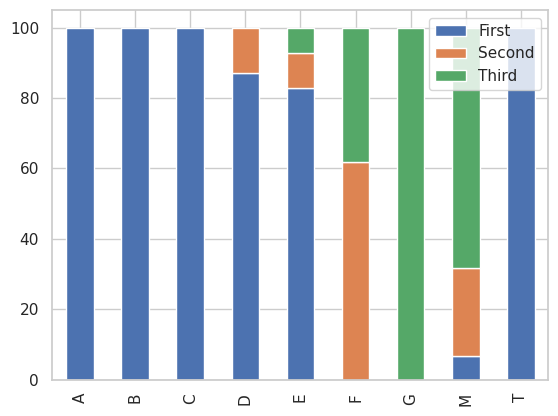

In [24]:
cols = ["First", "Second", "Third"]
deck_percent_df = pd.DataFrame(deck_percentages, index=cols).T  #index = cols because we immeditally transpose
deck_percent_df.plot(kind='bar', stacked=True)   #based on data structure this is way easier to just call plot with matplotlib rather than use seaborn

Here we can make sme observations about these data (train and test), from first class to third class:

* All of A, B, and C decks are First class, with a small amount of Second class on deck D and the rest comprised of First.
* Second class has a small proportion on deck D and E, with the majority on Deck F or missing.
* Third class has a small showing on Deck E (7.3%), a moderate showing on deck F (38.1%), and completly encompases deck G (100%)
* Of those missing a deck the majority (68.3%; 693 passengers) are third class passengers. Second class has 25.0% (254) of the missing share, and first class has a 6.6% (67) share of those missing a deck.
* The single passenger with cabin assignment [T](https://www.encyclopedia-titanica.org/cabins.html) (boat deck) is first class.


We may move the T deck assignment to A deck, as apperently there is no evidence this cabin was occupied. however I could not find it based on the deck plans. 

We may be able to ascertain what deck the missing cabin assignment passengers belonged to based on the cost of the ticket (fare). However, there are confounding factors, such as the number of passengers associated with a ticket and if there were any cabin changes after the purchase of the ticket(s).  

Median by Pclass and Deck
    deck  Pclass      Fare
0     A       1  35.07710
1     B       1  82.26670
2     C       1  86.28960
3     D       1  53.10000
4     D       2  13.39585
5     E       1  55.44170
6     E       2  11.42500
7     E       3  12.47500
8     F       2  26.00000
9     F       3   7.65000
10    G       3  16.70000
11    M       1  39.60000
12    M       2  15.66460
13    M       3   8.05000
14    T       1  35.50000


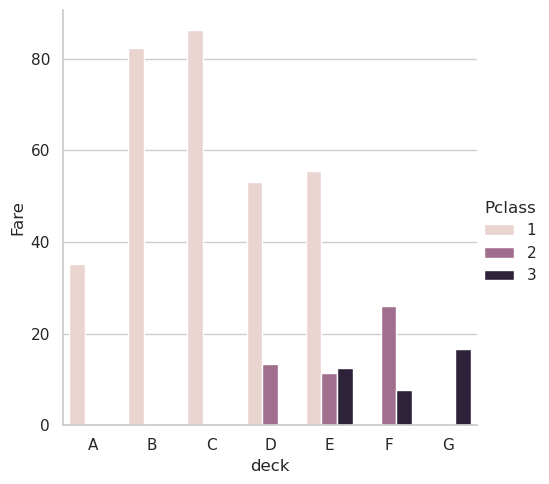

In [25]:
ds = titanic.groupby(['deck', 'Pclass'])['Fare'].median().reset_index()
print("Median by Pclass and Deck\n",ds)

ds=ds[ds['deck'].isin(["A","B","C","D","E","F","G"])]  #filter out our missing values for better visulization atm
sns.catplot(x='deck', y='Fare', hue='Pclass', data=ds, kind='bar');

If we ignore missing values for a second (which is the majority of the data mind you!) we can see how median Fare scales with Pclass and Deck. We see that Fare does not scale lineraly with deck for a given class of passenger. This could be down to a variety of reasons including when the ticket was sold, to who it was sold, multiple staterooms on the same ticket for some First and Second class passengers, how the ship was loaded, some sort of special promotion for the first sail of the Titanic (Deck A, which had smaller staterooms), or other economic factors.

We do see some odd pattens emerge, in particular with First class on A deck. Upon looking at the deck plans you can see a substantial difference in the size and extent of accomidation for A deck vs B & C deck (i.e. presence of a bath and intent for First class to have multiple rooms). It is also evident that First class and Second class were located mid-ship (with First class forward midship and Second classs rear midship), whereas third class and crew were located at the stern and the bow. 

Ultimatally we should be able to infer which deck a passenger was on based on fare, as well as bow, midship, or stern based on Pclass. To gain a little more insight let's check on the fare by Pclass and Deck 

In [26]:
# Move passenger from T deck to A deck based on fare match
titanic['deck'] = titanic['deck'].replace({"T":"A"})

In [27]:
titanic.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'alone', 'family_size',
       'age_range', 'deck'],
      dtype='object')

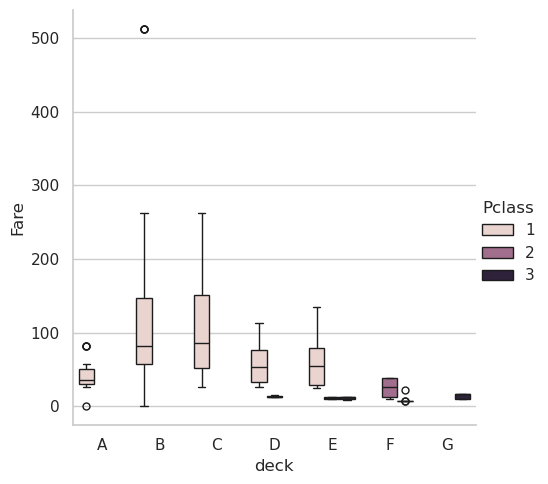

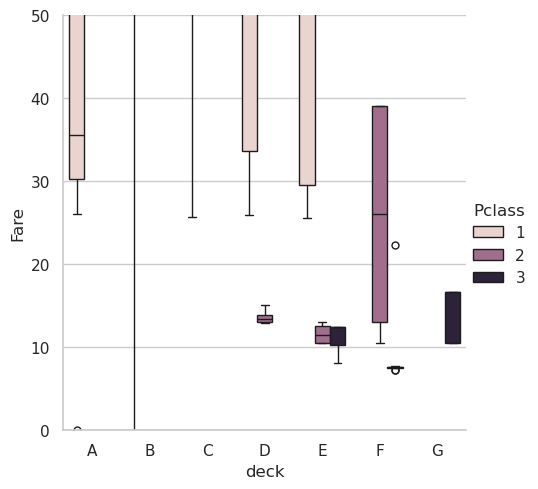

In [28]:
order=["A","B","C","D","E","F","G"] #order (and filtering) for categorical x axis
sns.catplot(x='deck',
            y='Fare',
            hue='Pclass',
            data=titanic,
            kind='box',
            order=order,
           );
sns.catplot(x='deck',
            y='Fare',
            hue='Pclass',
            data=titanic,
            kind='box',
            order=order,
           );
plt.ylim(0, 50);

Here we see the values for Second and Third class are generally distinct, but do have some overlap. We may be able to use the variance associated with the chare at each deck/class combo as a proxy. For example, Second class on deck D seems to be a very specific value (13.00) whereas deck E falls below that and deck F has a substantially greater range. As such in this instance:
For 2nd class and deck == M:
* If Fare == 13.00 then Deck = D
* Else if Fare < 13.00 then Deck = E
* Else Deck = F

Third Class has a similar story, deck F seems to have a Fare of 7.65 (although it is the lowest fare for third class). Deck E for third class seems to maximize at 12.475, and deck G covers part of the deck E range for third, so we will assume the top fares go to deck G and the lower fares go to deck E. 
For 3rd class and deck == M
* If Fare == 7.65 then Deck = F
* Else if Fare <= 12.475 && < 7.65 then Deck = E
* Else Deck = G

We can also note that it may be possible for some decks to be, all male (Sex=0) or all female (Sex=1), although it is probally more acurate to be refering to the seperation along the lines of forward (men) and aft (women/married couples). 

First class is a lot harder to unravel - and accounts for 40 missing. The coverage of First class in terms of decks occupied is large (A-E), with substantial overlap between the decks. For this we may need to turn to the most common values (mode) to see if any match. 

Mode by Pclass and Deck
 deck  Pclass   
A     1       0     35.5000
              1     81.8583
B     1       0    262.3750
C     1       0    263.0000
D     1       0     52.5542
      2       0     13.0000
E     1       0    134.5000
      2       0     10.5000
      3       0     12.4750
F     2       0     39.0000
      3       0      7.6500
G     3       0     16.7000
M     1       0     26.5500
      2       0     13.0000
      3       0      8.0500
Name: Fare, dtype: float64


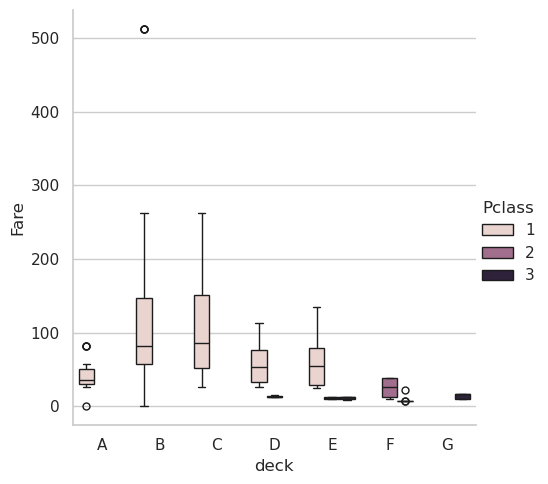

In [29]:
ds_mode = titanic.groupby(['deck', 'Pclass'])['Fare'].apply(lambda x: x.mode())
print('Mode by Pclass and Deck\n',ds_mode)

sns.catplot(x='deck', y='Fare', hue="Pclass", data=titanic, order=order, kind='box')

There are a few mode values - this is okay as we may be able to use some additional  indicator (such as age) to link passangers with deck, however it doen't seem that age gives us great seperability. Other options would to be to use the first PC of a PCA to extract some of the variability that may not be evident on a single variable alone, cluster via Kmeans, and attempt to categorize, or to spin up a random forest/gradient boost if those fail. As we are talking about 40 observations in the best surviving group we could also just assign to deck B and cross our fingers that other indicators of survival are far more important than Deck for this subset of passengers. 

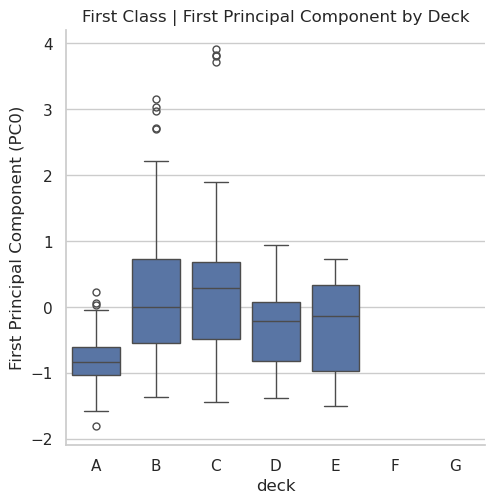

            PC0       PC1       PC2
Age   -0.356698  0.924936  0.131376
Fare   0.674596  0.157726  0.721140
SibSp  0.646287  0.345855 -0.680219


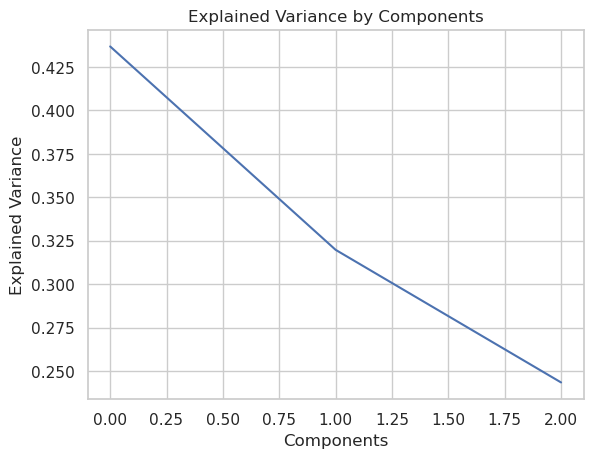

In [30]:
from sklearn.decomposition import PCA

# Subset of data (we want first class with decks already assigned), then Age, Fare, and family_size
df = titanic[(titanic['Pclass'] == 1) & (titanic['deck'] != "M")][['Age','Fare','SibSp']]
df_normalized = (df - df.mean()) / df.std()  # Normalize the data

pca = PCA(n_components=3, whiten=True)  # whiten arg uncorrelates the data 
pca_fit = pca.fit(df_normalized)

# Transform the normalized data using the PCA model
pca_transformed = pca.transform(df_normalized)

# Create a new DataFrame from the PCA-transformed data
pca_df = pd.DataFrame(pca_transformed, columns=['PC0', 'PC1', 'PC2'], index=df.index)

# Concatenate the PCA-transformed data with the original DataFrame to include the 'deck' column
result_df = pd.concat([titanic.loc[df.index, 'deck'], pca_df], axis=1)

# Plot using seaborn catplot
sns.catplot(x='deck', y='PC0', data=result_df, order=order, kind='box')
plt.ylabel('First Principal Component (PC0)')
plt.xlabel('deck')
plt.title('First Class | First Principal Component by Deck')
plt.show()

# Print the loadings for further inspection if needed
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
                        index=df.columns)
print(loadings)

# Plot the explained variance ratio for the components
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.title('Explained Variance by Components')
plt.show()


Finally we can get all of this pulled together and assign deck class by class for those with missing deck values.

In [31]:
def assign_deck(row):
    if row['Pclass'] == 1:
        if row['Fare'] == 35.50:
            return 'A'
        elif row['Fare'] <= 26.55:
            return 'E'
        else:
            return "C"
    if row['Pclass'] == 2:
        if row['Fare'] == 13.00:
            return 'D'
        elif row['Fare'] < 13.00:
            return 'E'
        else:
            return 'F'
    elif row['Pclass'] == 3:
        if row['Fare'] == 7.65:
            return 'F'
        elif row['Fare'] <= 12.475 and row['Fare'] > 7.65:
            return 'E'
        else:
            return 'G'
    return row['deck']

# Apply the function to rows where Deck is 'M'
titanic.loc[titanic['deck'] == 'M', 'deck'] =\
    titanic[titanic['deck'] == 'M'].apply(assign_deck, axis=1)


This is an excellent start, we have given a best guess based off of Fare as to which deck those with missing deck data belong. First class has a high amount of variability for decks B-E, so we take a stab at it based on the mode values for those decks in the howp that there is indeed some common base fare. 

Now we move on to determining what part of the ship the passengers were located on (forward, midship, aft, or unknown) and what side of the ship (port, starboard, or unknown). 

This is relatively easy for those with cabins, as we can use the cabin number (smaller for forward, larger for aft) and odd/even (odd for starboad, even for port). Although we will need to reference the deck plans as not every deck has cabins over the full length, making it harder to generalize.

For third class there is no good way to determin side of ship, so that will remain unknown, but it is easier to determine if they were located forward or aft, [based on Sex and if they were traveling with a spouse](https://www.encyclopedia-titanica.org/community/threads/men-and-women-separated-by-gender-on-titanic.5075/) (or presumably family in general).

![seperation of third class bysex](./misc/deck_seperation_by_sex.png)

In [32]:
# determine side of ship for those with a cabin number
import re

def resolve_side(x):
    if isinstance(x,float):    # Unknowns are NaN, NaNs are floats - Str for everything else
        return "Unknown"
    cabin_number_str = re.sub('[^0-9]', '', x)
    if cabin_number_str.isdigit():  # Check if we even have anything to cast to an int after removing characters
        cabin_number = int(cabin_number_str)
        if cabin_number % 2 == 0:
            return "Starboard"
        else:
            return "Port"
    else:
        return "Unknown"
        
titanic["ship_side"] = titanic["Cabin"].apply(resolve_side)
titanic['ship_side'] = titanic['ship_side'].astype('category')

In [33]:
'''
A -> all 1st class midship
B -> all 1st class midship
C -> all 1st class midship
D -> 3rd class aft, 2nd class midship, 1st class midship
E -> 3rd class aft (for women and famlies) and forward (for alone men), 2nd class midship, 1st class midship
F -> 3rd class aft (for women and famlies) and forward (for alone men), 2nd class midship
G -> 3rd class aft (for women and famlies)

'''

def resolve_location(row):
    sex = [row['Sex']]
    family_size = row['family_size']
    pclass = row['Pclass']
    deck = row['deck']

    if deck == 'A' or deck == 'B' or deck == 'C':
        return 'midship'
    elif deck == 'D':
        if pclass == 1 or pclass == 2:
            return 'midship'
        else:  # pclass == 3
            return 'far aft'
    elif deck == 'E':
        if pclass == 1 or pclass == 2:
            return 'midship'
        else:  # pclass == 3
            if sex == 'female' or family_size > 1:
                return 'aft'
            else:  # alone men
                return 'forward'
    elif deck == 'F':
        if pclass == 2:
            return 'midship'
        else:  # pclass == 3
            if sex == 'female' or family_size > 1:
                return 'aft'
            else:  # alone men
                return 'forward'
    elif deck == 'G':
        return 'aft'
    else:
        return 'Unknown'

# Create the new column by applying the function row by row
titanic['ship_loc'] = titanic.apply(resolve_location, axis=1).astype('category')
titanic['deck'] = titanic['deck'].astype('category')

# Display the first few rows to verify the results
print(titanic[['Pclass', 'Age', 'Sex', 'deck','ship_loc']].head(12))

    Pclass   Age     Sex deck ship_loc
0        3  22.0    male    G      aft
1        1  38.0  female    C  midship
2        3  26.0  female    E  forward
3        1  35.0  female    C  midship
4        3  35.0    male    E  forward
5        3  30.0    male    E  forward
6        1  54.0    male    E  midship
7        3   2.0    male    G      aft
8        3  27.0  female    E      aft
9        2  14.0  female    F  midship
10       3   4.0  female    G      aft
11       1  58.0  female    C  midship


#### Traveling group size by ticket
Analyizing ticket information. Passengers that traveled in groups are not exclusivly family (friends, caregivers, etc), therfore this feature is simmilar, but not the same as family size. Therfore it makes sense to derive ticketed group size from those travelng on the same ticket. 

We will need to pull in the test data for the analytics here, because we now ineed to consider inter-passenger relations. We will merge the two datasets (train and test)

There are many unique ticket values, so it makes a lot more sense to group them by their frequencies rather than analyizing the unique values. We chose not to group by prefixes as this information (if there is usable information in it) is likely to only indicate class or where the passenger embarked - information we already have. 

<Axes: xlabel='ticketed_group_size', ylabel='count'>

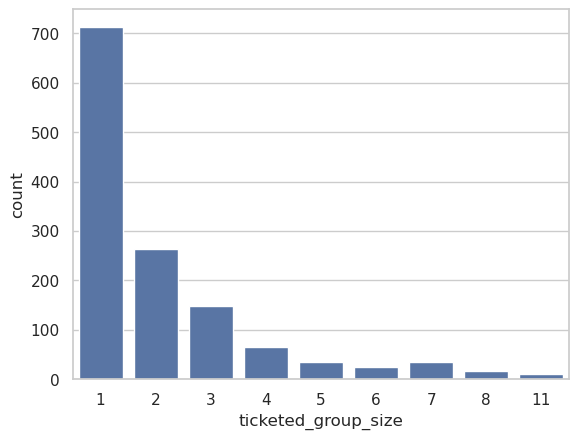

In [34]:
# Calculate the size of group that the ticket covers  
titanic['ticketed_group_size'] = titanic.groupby('Ticket')['Ticket'].transform('count')

sns.countplot(x='ticketed_group_size', data=titanic)

We can also update are alone variable to handle the ticketed_group size as well and be more discriptive:

In [35]:
titanic['with_family'] = (~titanic['alone']).astype(int) #invert and turn into an int
titanic['with_companions'] = titanic[['SibSp','Parch','with_family']].eq(0).any(axis=1)
titanic['with_companions'].astype('category')
titanic.drop(['alone','with_family'],axis=1, inplace=True)

#### Marriage Status and Titles

We already have some information if a passenger was stravling with a sibling or spouse, although there may be a bit more to extract here. 

Title can be extracted as part of the name feature - the prefix before the name itself. Some of these will be incorrect if we simply extract information based on the formatting of names alone. For example:  Miss, Mrs, Ms, Mlle, Lady, Mme, the Countess, Dona titles are replaced with Miss/Mrs/Ms because all of them are female. Values like Mlle, Mme and Dona are actually the name of the passengers, but they are classified as titles because Name feature is split by comma. Dr, Col, Major, Jonkheer, Capt, Sir, Don and Rev titles are replaced with Dr/Military/Noble/Clergy because those passengers have similar characteristics. Master is a unique title. It is given to male passengers below age 26. They have the highest survival rate among all males.

is_married is a binary feature based on the Mrs title. Mrs title has the highest survival rate among other female titles. This title needs to be a feature because all female titles are grouped with each other.

In [36]:
# Extract the prefix from the names
titanic['title'] = titanic['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

# Default married to single, then over-write if the title implies marrage (Mrs.) 
titanic['is_married'] = 0
titanic.loc[titanic['title'] == 'Mrs', 'is_married'] = 1
titanic['is_married'] = titanic['is_married'].astype('category')

# Print out the unique found titles
print(titanic['title'].unique())

# Filter tiles, collapsing male and female titles based on social norms
#    of the time and any errors. Mr is already extracted.
female_titles = ['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona']
male_titles = ['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev']

titanic['title'] = titanic['title'].replace(female_titles, 'Miss/Mrs/Ms')
titanic['title'] = titanic['title'].replace(male_titles, 'Dr/Military/Noble/Clergy')
titanic['title'] = titanic['title'].astype('category')

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


/tmp/ipykernel_1556174/1648323909.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),


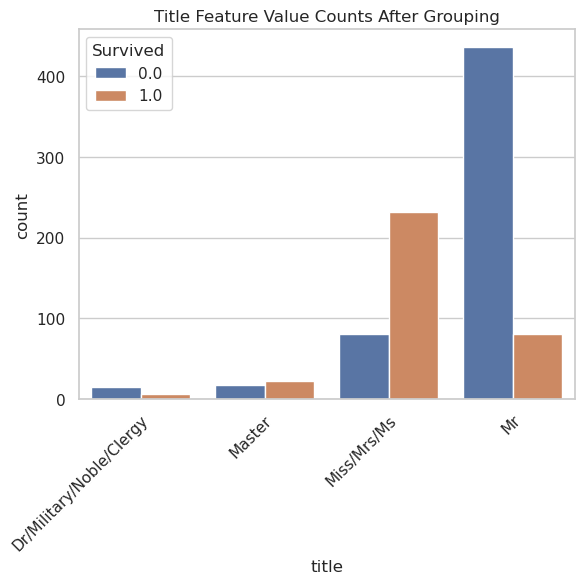

In [37]:
sns.countplot(x='title', hue='Survived', data=titanic)
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(),
                    rotation=45,
                    ha="right",
                    rotation_mode="anchor");
ax.set_title('Title Feature Value Counts After Grouping');

#### Feature encoding
Several features are categories of objects, as we see below. 

categorical: age_range, deck, ship_side, ship_loc, title

object: Cabin, Embarked, Name, Ticket, is_married, Sex

We will use the LabelEncoder to convert to numaric type as classes from **0** to **n**. This is a necessary step such that the information is able to be used for larning from models. 


In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1309 non-null   float64 
 1   Cabin                295 non-null    object  
 2   Embarked             1309 non-null   object  
 3   Fare                 1308 non-null   float64 
 4   Name                 1309 non-null   object  
 5   Parch                1309 non-null   int64   
 6   PassengerId          1309 non-null   int64   
 7   Pclass               1309 non-null   int64   
 8   Sex                  1309 non-null   object  
 9   SibSp                1309 non-null   int64   
 10  Survived             891 non-null    float64 
 11  Ticket               1309 non-null   object  
 12  family_size          1309 non-null   int64   
 13  age_range            1309 non-null   category
 14  deck                 1309 non-null   category
 15  ship_side            

In [39]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

non_numaric_features = ['Cabin', 'Embarked', 'Name', 'Ticket', 'Sex', 'is_married']
for feature in non_numaric_features:
    titanic[feature] = LabelEncoder().fit_transform(titanic[feature])

Categorical features are converted with One-Hot encoding

In [40]:
cat_features = ['age_range', 'deck', 'ship_side', 'ship_loc', 'title', 'Embarked']
encoded_features = []
for feature in cat_features:
    encoded_feat = OneHotEncoder().fit_transform(titanic[feature].values.reshape(-1, 1)).toarray()
    n = titanic[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
    encoded_df = pd.DataFrame(encoded_feat, columns=cols)
    encoded_df.index = titanic.index
    encoded_features.append(encoded_df)
#print(*encoded_features[:)
titanic = pd.concat([titanic, *encoded_features], axis=1)

In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1309 non-null   float64 
 1   Cabin                1309 non-null   int64   
 2   Embarked             1309 non-null   int64   
 3   Fare                 1308 non-null   float64 
 4   Name                 1309 non-null   int64   
 5   Parch                1309 non-null   int64   
 6   PassengerId          1309 non-null   int64   
 7   Pclass               1309 non-null   int64   
 8   Sex                  1309 non-null   int64   
 9   SibSp                1309 non-null   int64   
 10  Survived             891 non-null    float64 
 11  Ticket               1309 non-null   int64   
 12  family_size          1309 non-null   int64   
 13  age_range            1309 non-null   category
 14  deck                 1309 non-null   category
 15  ship_side            

In [42]:
titanic_train = titanic.iloc[:len(titanic_train.index)]    # Not the best way to do this, but data in are guarenteed to be sorted based on previous cells
titanic_test = titanic.iloc[len(titanic_train.index):].drop(['Survived'],axis=1)    # just nans in survive

In [43]:
drop_cols = ['age_range', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
             'Pclass', 'Sex', 'SibSp', 'Ticket', 'family_size',
             'deck', 'ship_side', 'ship_loc', 'ticketed_group_size',
             'title']


titanic_train.drop(columns=drop_cols, inplace=True)
titanic_test.drop(columns=(drop_cols), inplace=True)
#titanic_test.drop(columns=['Survived'], inplace=True)

titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              418 non-null    float64
 1   with_companions  418 non-null    bool   
 2   is_married       418 non-null    int64  
 3   age_range_1      418 non-null    float64
 4   age_range_2      418 non-null    float64
 5   age_range_3      418 non-null    float64
 6   age_range_4      418 non-null    float64
 7   age_range_5      418 non-null    float64
 8   deck_1           418 non-null    float64
 9   deck_2           418 non-null    float64
 10  deck_3           418 non-null    float64
 11  deck_4           418 non-null    float64
 12  deck_5           418 non-null    float64
 13  deck_6           418 non-null    float64
 14  deck_7           418 non-null    float64
 15  ship_side_1      418 non-null    float64
 16  ship_side_2      418 non-null    float64
 17  ship_side_3  

/tmp/ipykernel_1556174/357689962.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train.drop(columns=drop_cols, inplace=True)


In [44]:
X_train = StandardScaler().fit_transform(titanic_train.drop(['Survived'], axis=1))
y_train = titanic_train['Survived'].values
X_test = StandardScaler().fit_transform(titanic_test)

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 28)
y_train shape: (891,)
X_test shape: (418, 28)


In [45]:
SEED=42
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
single_best_model = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='sqrt',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)

leaderboard_model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='sqrt',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1) 

In [46]:
N = 5
oob = 0
probs = pd.DataFrame(np.zeros((len(X_test), N * 2)), columns=['Fold_{}_Prob_{}'.format(i, j) for i in range(1, N + 1) for j in range(2)])
importances = pd.DataFrame(np.zeros((X_train.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=titanic_train.drop(['Survived'], axis=1).columns)
fprs, tprs, scores = [], [], []

skf = StratifiedKFold(n_splits=N, random_state=N, shuffle=True)

for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    print('Fold {}\n'.format(fold))
    
    # Fitting the model
    single_best_model.fit(X_train[trn_idx], y_train[trn_idx])
    
    # Computing Train AUC score
    trn_fpr, trn_tpr, trn_thresholds = roc_curve(y_train[trn_idx], single_best_model.predict_proba(X_train[trn_idx])[:, 1])
    trn_auc_score = auc(trn_fpr, trn_tpr)
    # Computing Validation AUC score
    val_fpr, val_tpr, val_thresholds = roc_curve(y_train[val_idx], single_best_model.predict_proba(X_train[val_idx])[:, 1])
    val_auc_score = auc(val_fpr, val_tpr)  
      
    scores.append((trn_auc_score, val_auc_score))
    fprs.append(val_fpr)
    tprs.append(val_tpr)
    
    # X_test probabilities
    probs.loc[:, 'Fold_{}_Prob_0'.format(fold)] = single_best_model.predict_proba(X_test)[:, 0]
    probs.loc[:, 'Fold_{}_Prob_1'.format(fold)] = single_best_model.predict_proba(X_test)[:, 1]
    importances.iloc[:, fold - 1] = single_best_model.feature_importances_
        
    oob += single_best_model.oob_score_ / N
    print('Fold {} OOB Score: {}\n'.format(fold, single_best_model.oob_score_))   
    
print('Average OOB Score: {}'.format(oob))


Fold 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Fold 1 OOB Score: 0.8286516853932584

Fold 2



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Fold 2 OOB Score: 0.814866760168303

Fold 3



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Fold 3 OOB Score: 0.8218793828892006

Fold 4



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Fold 4 OOB Score: 0.82328190743338

Fold 5



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


Fold 5 OOB Score: 0.8288920056100981

Average OOB Score: 0.8235143482988481


[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1100 out of 1100 | elapsed:    0.1s finished


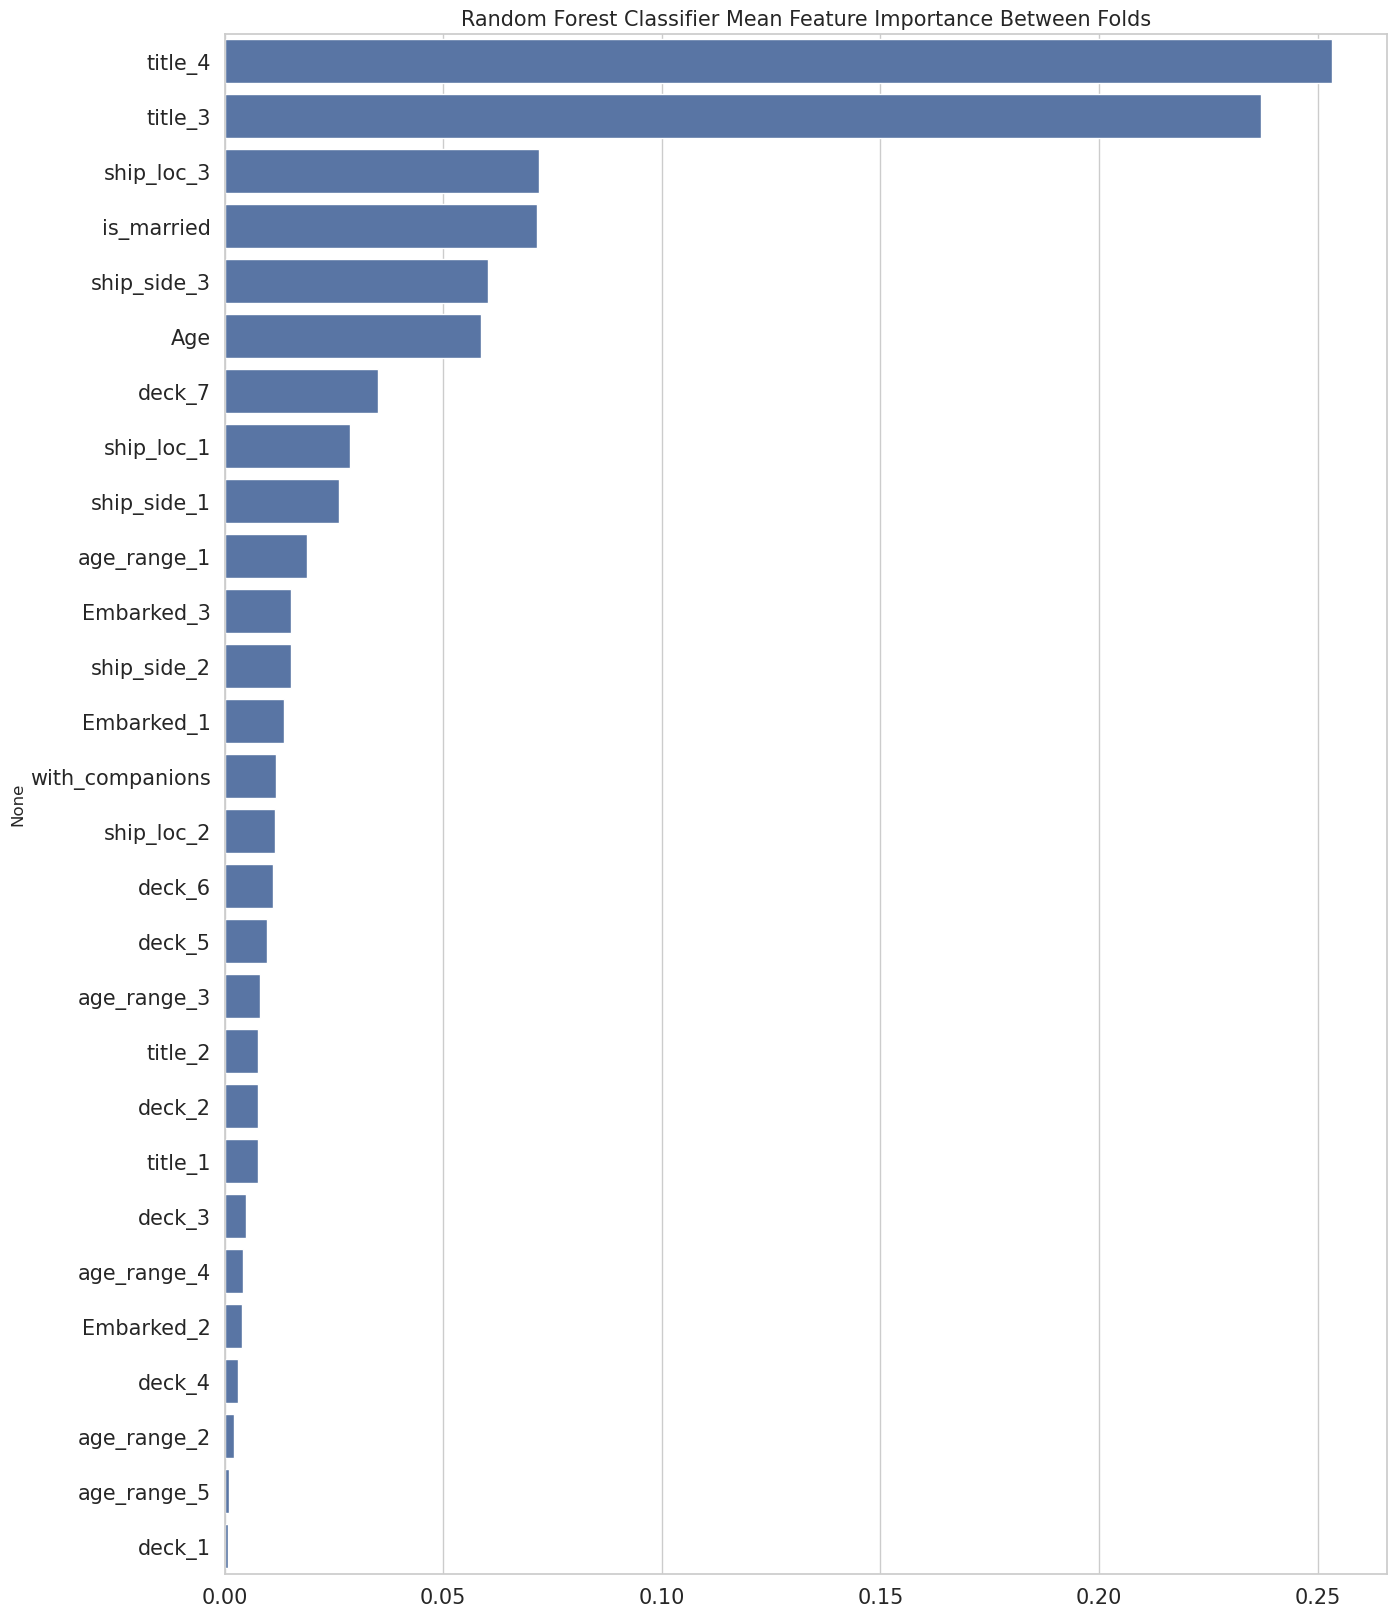

In [47]:


importances['Mean_Importance'] = importances.mean(axis=1)
importances.sort_values(by='Mean_Importance', inplace=True, ascending=False)

plt.figure(figsize=(15, 20))
sns.barplot(x='Mean_Importance', y=importances.index, data=importances)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Random Forest Classifier Mean Feature Importance Between Folds', size=15)

plt.show()



In [48]:
titanic_pred = titanic.iloc[len(titanic_train.index):].drop(['Survived'], axis=1)

class_survived = [col for col in probs.columns if col.endswith('Prob_1')]
probs['1'] = probs[class_survived].sum(axis=1) / N
probs['0'] = probs.drop(columns=class_survived).sum(axis=1) / N
probs['pred'] = 0
pos = probs[probs['1'] >= 0.5].index
probs.loc[pos, 'pred'] = 1

y_pred = probs['pred'].astype(int)

submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = titanic_pred['PassengerId']
submission_df['Survived'] = y_pred.values
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df.head(10)



,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
896,897,0
897,898,0
898,899,0
899,900,1
900,901,0


In [49]:
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(
            max_depth = 4, 
            n_estimators = 3000,#len(titanic_test.columns),
            max_features=None,
            learning_rate= 0.1,
            random_state=42,
            verbose=True, 
            warm_start=False
            )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#print(np.round(y_pred[:]).min())
print('classifier pred max:' , y_pred.max())
print('classifier pred min:' , y_pred.min())
# from sklearn.metrics import mean_squared_error
# #errors = mean_squared_error(ytest, ypred)
# #errors


      Iter       Train Loss   Remaining Time 
         1           1.2371           43.50s
         2           1.1594           24.59s
         3           1.0958           24.97s
         4           1.0433           22.02s
         5           0.9994           18.70s
         6           0.9621           16.47s
         7           0.9304           14.92s
         8           0.9033           13.73s
         9           0.8786           12.66s
        10           0.8569           11.74s
        20           0.7396            7.73s
        30           0.6853            6.23s
        40           0.6488            5.46s
        50           0.6117            5.04s
        60           0.5850            4.72s
        70           0.5641            4.49s
        80           0.5444            4.32s
        90           0.5220            4.15s
       100           0.5023            4.03s
       200           0.3946            3.41s
       300           0.3347            3.15s
       40

In [50]:
titanic_pred = titanic.iloc[len(titanic_train.index):].drop(['Survived'], axis=1)
titanic_pred["Survived"] = y_pred.astype(int)

In [51]:
y_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [52]:
titanic_pred.describe()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,ship_loc_2,ship_loc_3,title_1,title_2,title_3,title_4,Embarked_1,Embarked_2,Embarked_3,Survived
count,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,29.583732,166.114833,1.401914,35.627188,647.456938,0.392344,1100.500000,2.265550,0.636364,0.447368,...,0.263158,0.478469,0.011962,0.050239,0.363636,0.574163,0.244019,0.110048,0.645933,0.366029
std,13.289256,44.487017,0.854496,55.907576,384.403190,0.981429,120.810458,0.841838,0.481622,0.896760,...,0.440875,0.500135,0.108844,0.218700,0.481622,0.495062,0.430019,0.313324,0.478803,0.482295
min,0.170000,1.000000,0.000000,0.000000,1.000000,0.000000,892.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,186.000000,1.000000,7.895800,309.250000,0.000000,996.250000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,186.000000,2.000000,14.454200,643.000000,0.000000,1100.500000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,37.450000,186.000000,2.000000,31.500000,990.750000,0.000000,1204.750000,3.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,76.000000,186.000000,2.000000,512.329200,1304.000000,9.000000,1309.000000,3.000000,1.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Pclass', ylabel='Age'>

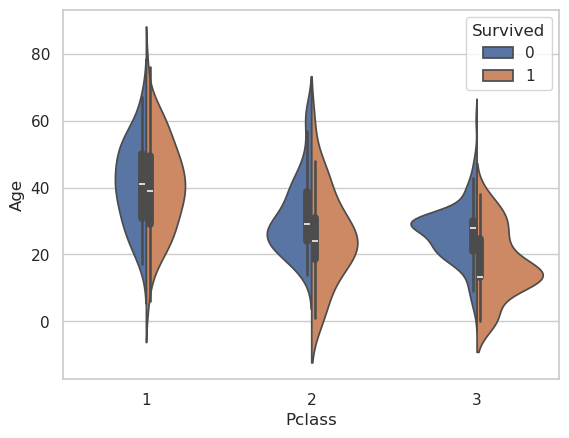

In [53]:
sns.violinplot(
           y="Age",
            x='Pclass',
            hue='Survived',
            data=titanic_pred,
            split=True,
            #kind='boxen'
            )

In [54]:
titanic_pred[['PassengerId', 'Survived']].set_index('PassengerId',drop=True).to_csv('output.csv')

In [55]:
!pip install TensorFlow

In [56]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model = Sequential()

# Get the number of columns in the training dataset
n_cols = X_train.shape[1]


2024-06-29 21:10:00.682502: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-29 21:10:00.708339: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [57]:
# # Define model (1 hidel layer that contains 100 nodes)
# model.add(Dense(100, input_dim=n_cols, activation="relu"))
# model.add(Dense(1, activation="sigmoid"))

# Define model (two hidden layers with 100 nodes)
model.add(Dense(100, input_dim = n_cols, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"]
             )


/home/skye/miniconda3/envs/Spatial_stats/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
# Fit the model on the dataset
model.fit(X_train,
          y_train,
          epochs=1000,
          batch_size=32
         )


Epoch 1/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6492 - loss: 0.6366
Epoch 2/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8299 - loss: 0.4118
Epoch 3/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8386 - loss: 0.4100
Epoch 4/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8552 - loss: 0.3582
Epoch 5/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8657 - loss: 0.3447
Epoch 6/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8716 - loss: 0.3458 
Epoch 7/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.3538 
Epoch 8/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8734 - loss: 0.3176 
Epoch 9/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8688 - loss: 0.3197 
Epoch 10/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.8540 - loss: 0.3534
Epoch 11/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.8798 - loss: 0.3270
Epoch 12/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [59]:
# Evaluate the model
model.evaluate(X_train, y_train)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9406 - loss: 0.1401


[0.13653115928173065, 0.9405162930488586]

In [60]:
# Make probability predictions with the model
y_pred = model.predict(X_test)
y_class = (y_pred > 0.5).astype("int32")
#y_class.mean()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [61]:
y_class

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [62]:
titanic_pred = titanic.iloc[len(titanic_train.index):].drop(['Survived'], axis=1)
titanic_pred["Survived"] = y_class
titanic_pred[['PassengerId', 'Survived']].set_index('PassengerId',drop=True).to_csv('output.csv')